In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

import mplhep as hep
hep.style.use([hep.style.ATLAS])

data = pd.read_parquet('~/H_Zg/samples_processed/MC23/Zee_deriv_epairs_all_events_cut_and_predicted.parquet')

In [42]:
print(data.columns)

Index(['event_index', 'el1_index', 'el2_index', 'runNumber', 'eventNumber',
       'actualInteractionsPerCrossing', 'averageInteractionsPerCrossing',
       'm_ee', 'isZ', 'el1_pt', 'el1_eta', 'el1_phi', 'el1_m', 'el1_charge',
       'el1_ptvarcone20', 'el1_topoetcone20', 'el1_topoetcone40', 'el1_f1',
       'el1_neflowisol20', 'el1_truthPdgId', 'el1_truthType',
       'el1_truthOrigin', 'el1_DFCommonElectronsECIDS',
       'el1_DFCommonElectronsECIDSResult', 'el1_DFCommonElectrons_pel',
       'el1_DFCommonElectrons_LHLoose', 'el1_GSFTrack_d0', 'el1_GSFTrack_z0',
       'el1_GSFTrack_theta', 'el1_GSFTrack_phi', 'el1_GSFTrack_qOverP',
       'el1_GSF_dR', 'el1_GSF_Track_Var0', 'el1_GSF_Track_Var1',
       'el1_GSF_Track_Var2', 'el1_GSF_Track_Var3', 'el1_GSF_Track_Var4',
       'el2_pt', 'el2_eta', 'el2_phi', 'el2_m', 'el2_charge',
       'el2_ptvarcone20', 'el2_topoetcone20', 'el2_topoetcone40', 'el2_f1',
       'el2_neflowisol20', 'el2_truthPdgId', 'el2_truthType',
       'el2_truthOr

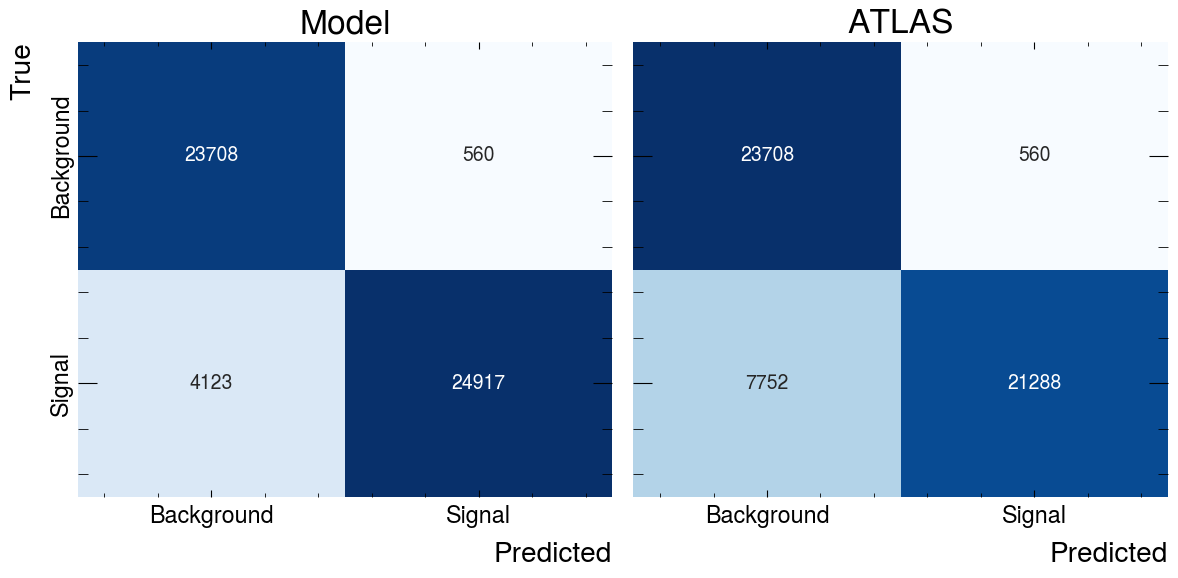

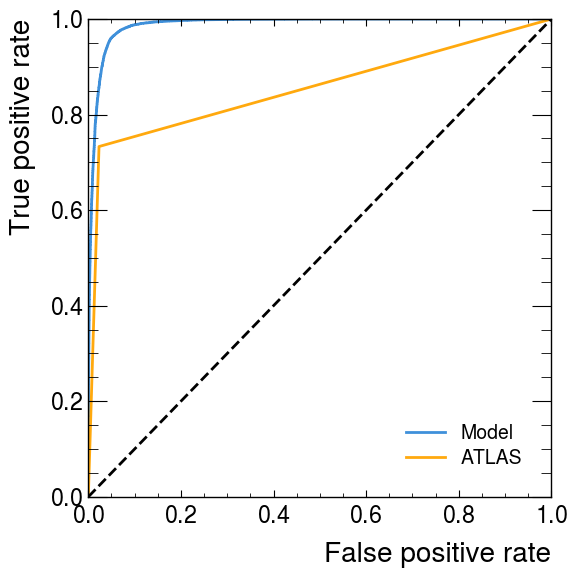

In [43]:
# confusion matrix

cm_model = confusion_matrix(data['isZ'], data['prediction'])
cm_ATLAS = confusion_matrix(data['isZ'], data['ATLAS_label'])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_model, annot=True, fmt='d', ax=ax[0], cmap='Blues', cbar=False)
sns.heatmap(cm_ATLAS, annot=True, fmt='d', ax=ax[1], cmap='Blues', cbar=False)

ax[0].set_title('Model')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')
ax[0].set_xticklabels(['Background', 'Signal'])
ax[0].set_yticklabels(['Background', 'Signal'])

ax[1].set_title('ATLAS')
ax[1].set_xlabel('Predicted')
ax[1].set_yticklabels([])
ax[1].set_xticklabels(['Background', 'Signal'])
fig.tight_layout()

# ROC curve

fpr_model, tpr_model, _ = roc_curve(data['isZ'], data['score'])
fpr_ATLAS, tpr_ATLAS, _ = roc_curve(data['isZ'], data['ATLAS_label'])

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr_model, tpr_model, label='Model')
ax.plot(fpr_ATLAS, tpr_ATLAS, label='ATLAS')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
fig.tight_layout()

no


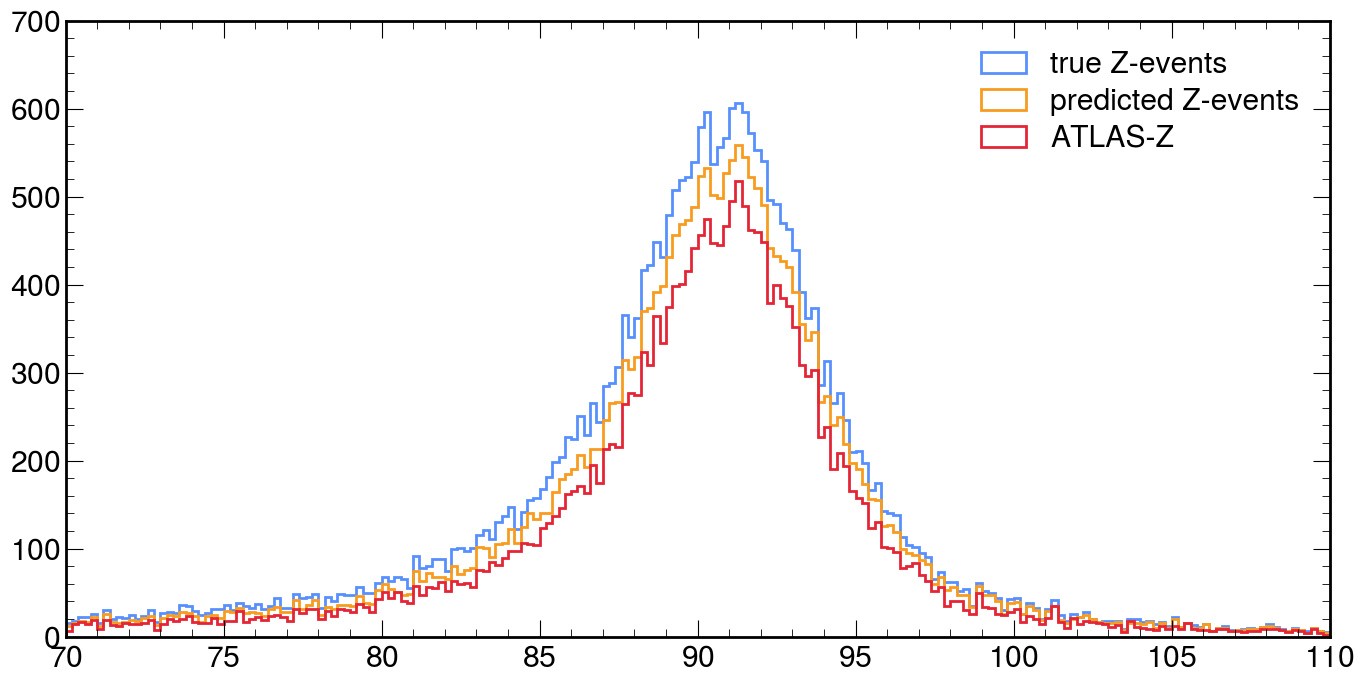

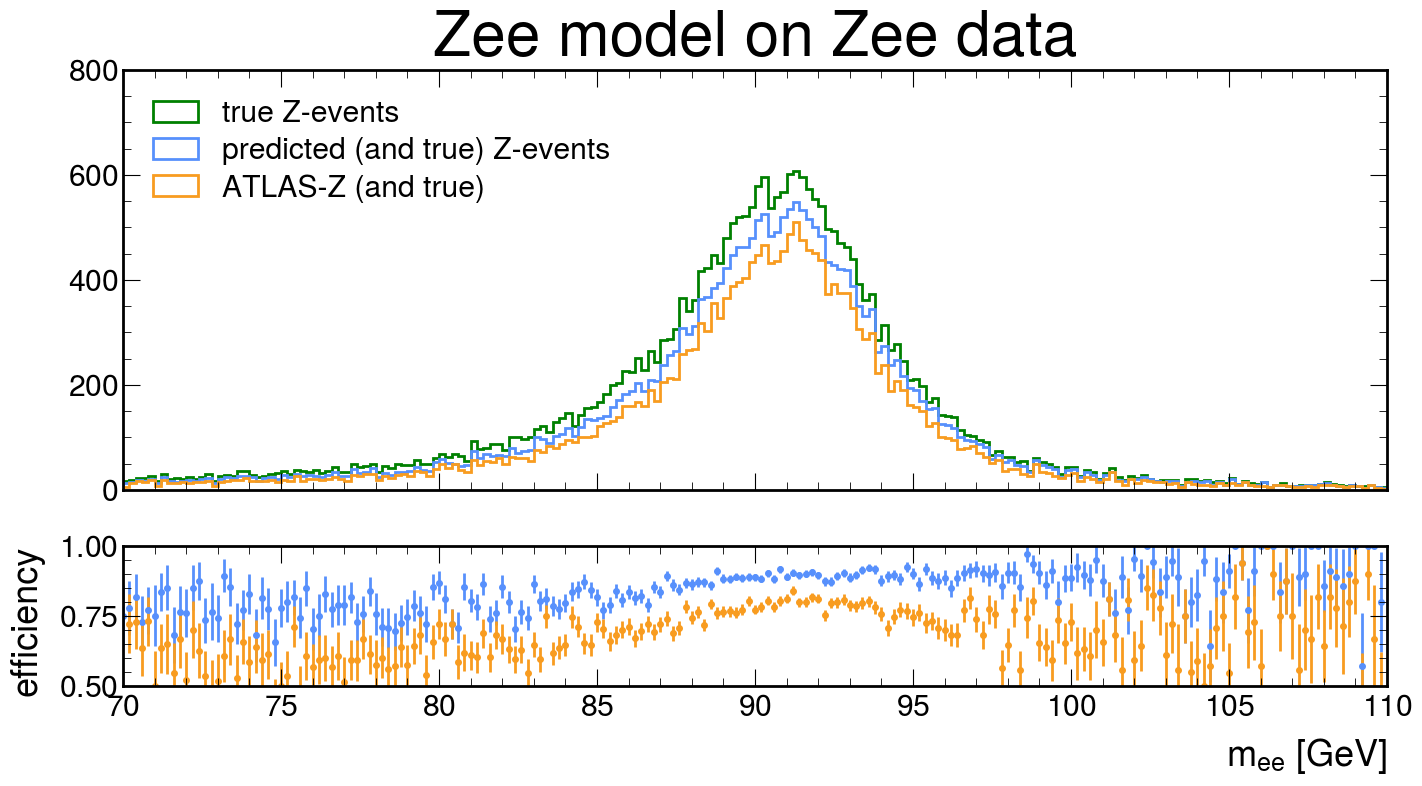

In [44]:
n_bins = 200
plt.style.use([hep.style.ROOT, hep.style.firamath])
fig, ax = plt.subplots( figsize=(16, 8))
ax.hist(data['m_ee'][data['isZ']==1], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='true Z-events')
ax.hist(data['m_ee'][data['prediction']], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='predicted Z-events')
ax.hist(data['m_ee'][data['ATLAS_label']==1], bins=n_bins,linewidth=2, range=(70, 110), histtype='step', label='ATLAS-Z')
ax.legend()

plt.style.use([hep.style.ROOT, hep.style.firamath])
fig, ax = plt.subplots(2,1, figsize=(16, 8), height_ratios=[3, 1])
counts_true, bins_true, _ = ax[0].hist(data['m_ee'][data['isZ']==1], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='true Z-events', color='green')
counts_trueandmodel, bins_trueandmodel, _ = ax[0].hist(data['m_ee'][(data['prediction']==1) & (data['isZ']==1)], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='predicted (and true) Z-events')
counts_trueandATLAS, bins_TrueandATLAS, _ = ax[0].hist(data['m_ee'][(data['ATLAS_label']==1) & (data['isZ']==1)], bins=n_bins,linewidth=2, range=(70, 110), histtype='step', label='ATLAS-Z (and true)')
ax[0].legend(loc='upper left')
ax[0].set_xticklabels([])
eff_model = counts_trueandmodel/counts_true
eff_ATLAS = counts_trueandATLAS/counts_true

uncertainty_model = np.sqrt(eff_model*(1-eff_model)/counts_true)
uncertainty_ATLAS = np.sqrt(eff_ATLAS*(1-eff_ATLAS)/counts_true)

ax[1].errorbar(bins_true[:-1], eff_model, yerr=uncertainty_model, fmt='.', label='model')
ax[1].errorbar(bins_true[:-1], eff_ATLAS, yerr=uncertainty_ATLAS, fmt='.', label='ATLAS')
ax[1].set_xlabel('$m_{ee}$ [GeV]')
ax[1].set_ylabel('efficiency')
ax[1].set_ylim(0.5,1)

ax[0].set_title('Zee model on Zee data')
# ax[1].legend()

print('no')

In [45]:
higgs_data = pd.read_parquet('~/H_Zg/samples_processed/MC23/higgs_data_with_predictions.parquet')


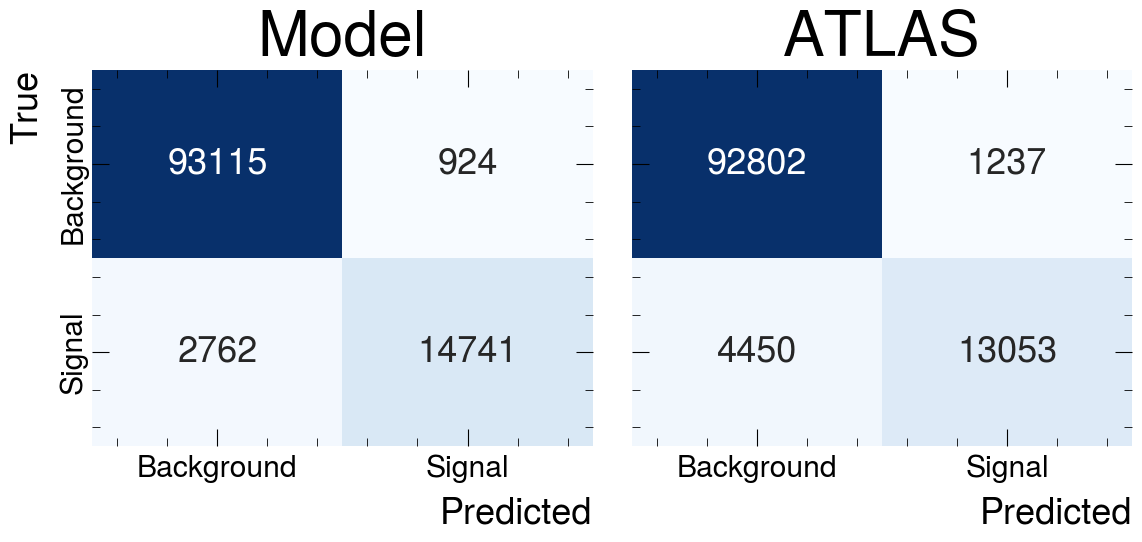

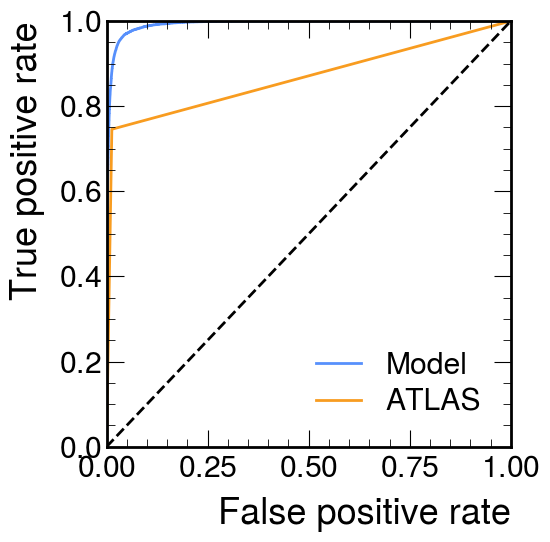

In [46]:
# confusion matrix

cm_model = confusion_matrix(higgs_data['isZ'], higgs_data['prediction'])
cm_ATLAS = confusion_matrix(higgs_data['isZ'], higgs_data['ATLAS_label'])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_model, annot=True, fmt='d', ax=ax[0], cmap='Blues', cbar=False)
sns.heatmap(cm_ATLAS, annot=True, fmt='d', ax=ax[1], cmap='Blues', cbar=False)

ax[0].set_title('Model')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')
ax[0].set_xticklabels(['Background', 'Signal'])
ax[0].set_yticklabels(['Background', 'Signal'])

ax[1].set_title('ATLAS')
ax[1].set_xlabel('Predicted')
ax[1].set_yticklabels([])
ax[1].set_xticklabels(['Background', 'Signal'])
fig.tight_layout()

# ROC curve

fpr_model, tpr_model, _ = roc_curve(higgs_data['isZ'], higgs_data['score'])
fpr_ATLAS, tpr_ATLAS, _ = roc_curve(higgs_data['isZ'], higgs_data['ATLAS_label'])

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr_model, tpr_model, label='Model')
ax.plot(fpr_ATLAS, tpr_ATLAS, label='ATLAS')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
fig.tight_layout()

Text(0.5, 1.0, 'Zee model on Higgs data')

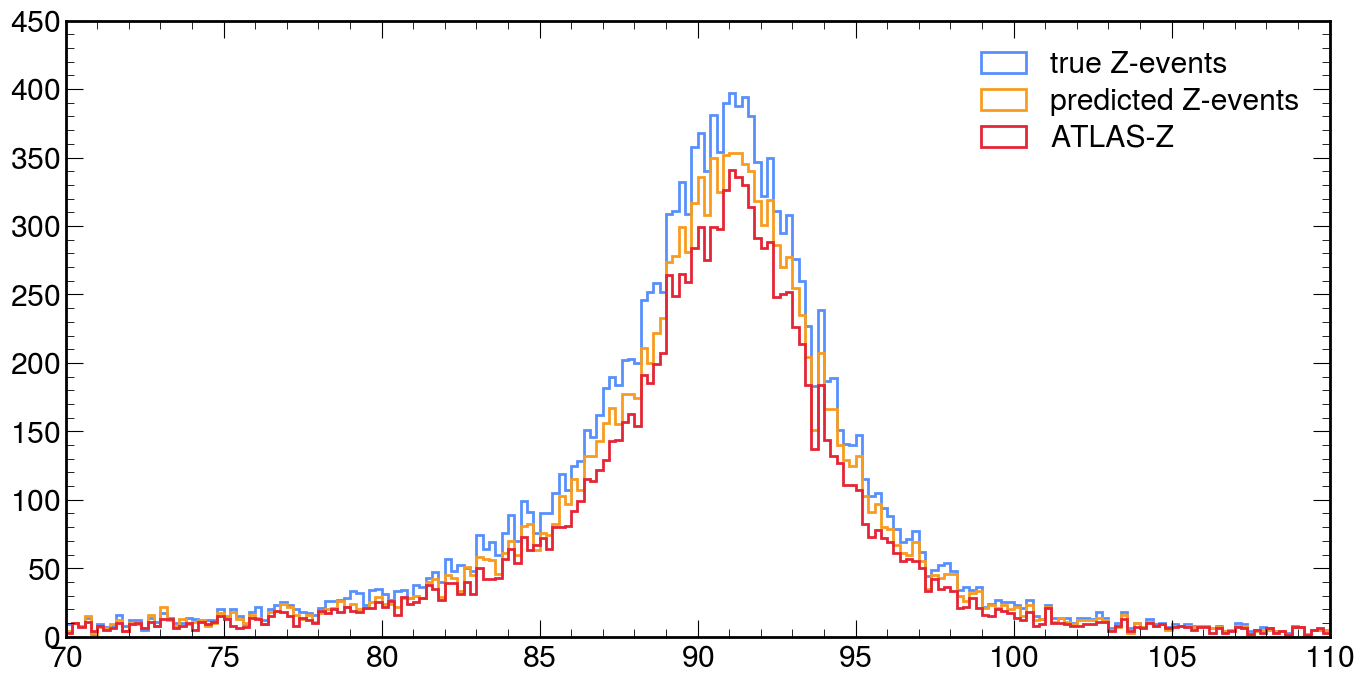

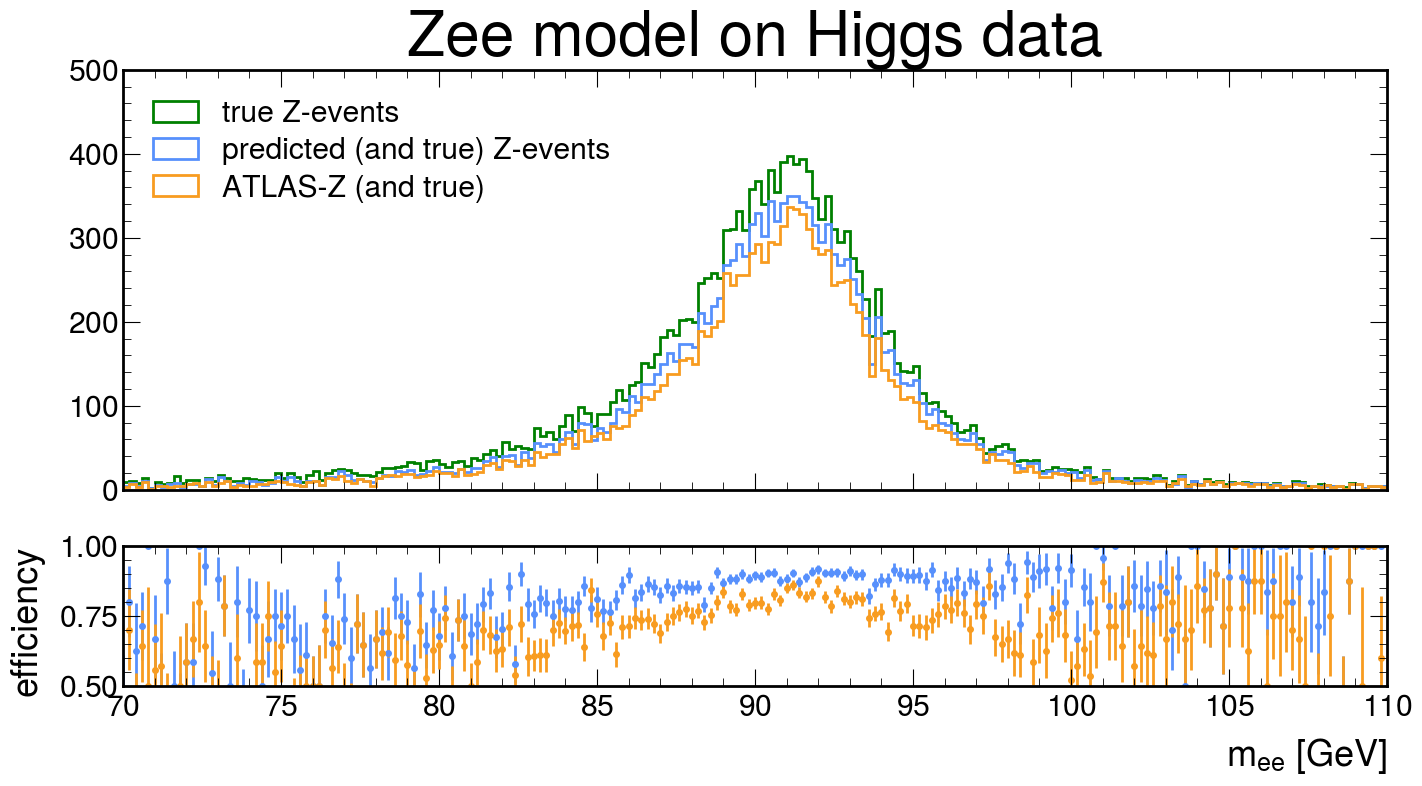

In [49]:
n_bins = 200
plt.style.use([hep.style.ROOT, hep.style.firamath])
fig, ax = plt.subplots( figsize=(16, 8))
ax.hist(higgs_data['m_ee'][higgs_data['isZ']==1], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='true Z-events')
ax.hist(higgs_data['m_ee'][higgs_data['prediction']], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='predicted Z-events')
ax.hist(higgs_data['m_ee'][higgs_data['ATLAS_label']==1], bins=n_bins,linewidth=2, range=(70, 110), histtype='step', label='ATLAS-Z')
ax.legend()

plt.style.use([hep.style.ROOT, hep.style.firamath])
fig, ax = plt.subplots(2,1, figsize=(16, 8), height_ratios=[3, 1])
counts_true, bins_true, _ = ax[0].hist(higgs_data['m_ee'][higgs_data['isZ']==1], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='true Z-events', color='green')
counts_trueandmodel, bins_trueandmodel, _ = ax[0].hist(higgs_data['m_ee'][(higgs_data['prediction']==1) & (higgs_data['isZ']==1)], bins=n_bins, range=(70, 110),linewidth=2, histtype='step', label='predicted (and true) Z-events')
counts_trueandATLAS, bins_TrueandATLAS, _ = ax[0].hist(higgs_data['m_ee'][(higgs_data['ATLAS_label']==1) & (higgs_data['isZ']==1)], bins=n_bins,linewidth=2, range=(70, 110), histtype='step', label='ATLAS-Z (and true)')
ax[0].legend(loc='upper left')
ax[0].set_xticklabels([])
eff_model = counts_trueandmodel/counts_true
eff_ATLAS = counts_trueandATLAS/counts_true

uncertainty_model = np.sqrt(eff_model*(1-eff_model)/counts_true)
uncertainty_ATLAS = np.sqrt(eff_ATLAS*(1-eff_ATLAS)/counts_true)

ax[1].errorbar(bins_true[:-1], eff_model, yerr=uncertainty_model, fmt='.', label='model')
ax[1].errorbar(bins_true[:-1], eff_ATLAS, yerr=uncertainty_ATLAS, fmt='.', label='ATLAS')
ax[1].set_xlabel('$m_{ee}$ [GeV]')
ax[1].set_ylabel('efficiency')
ax[1].set_ylim(0.5,1)

ax[0].set_title('Zee model on Higgs data')

# ax[1].legend()